In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression 
from sklearn.tree import DecisionTreeClassifier , DecisionTreeRegressor , BaseDecisionTree


In [15]:
df = pd.read_csv("IRIS.csv")

In [16]:

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [17]:
new_df  = df.drop(['species'] , axis=1)

In [18]:
new_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


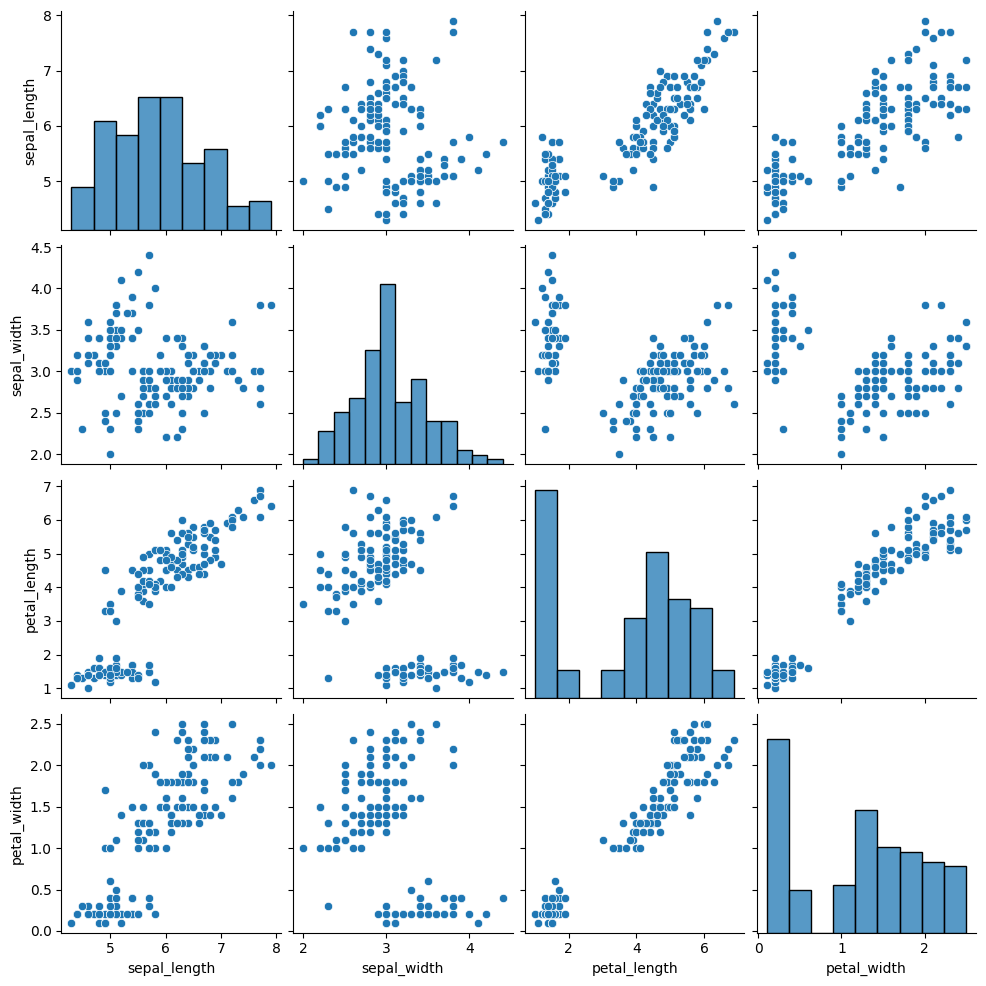

In [19]:
sns.pairplot(data=new_df)
plt.show()

In [20]:
x = new_df.iloc[:,:-1]
y = new_df["sepal_length"]

In [21]:
from sklearn.cluster import KMeans  

In [22]:

wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters  = i,init='k-means++')
    km.fit(new_df)
    wcss.append(km.inertia_)
    

c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

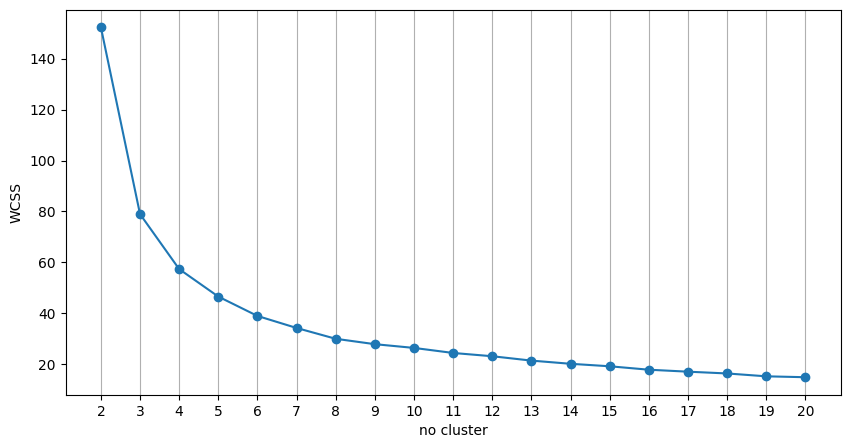

In [23]:
plt.figure(figsize=(10,5))
plt.plot([i for i in range (2,21) ] , wcss , marker = "o") # ye show dots dikh rahe hai jo representaion ke liye use hue hai wo 'marker' ki vaja se hai
plt.xlabel("no cluster")
plt.xticks([i for i in range (2,21)])
plt.ylabel("WCSS")
plt.grid(axis="x") # ye jo lines dikh rahi hai graph mein wo grid ki vajah se hai
plt.show()

In [24]:
kmn = KMeans(n_clusters=3)
new_df["Predict"] = kmn.fit_predict(new_df)

c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
new_df

,sepal_length,sepal_width,petal_length,petal_width,Predict
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


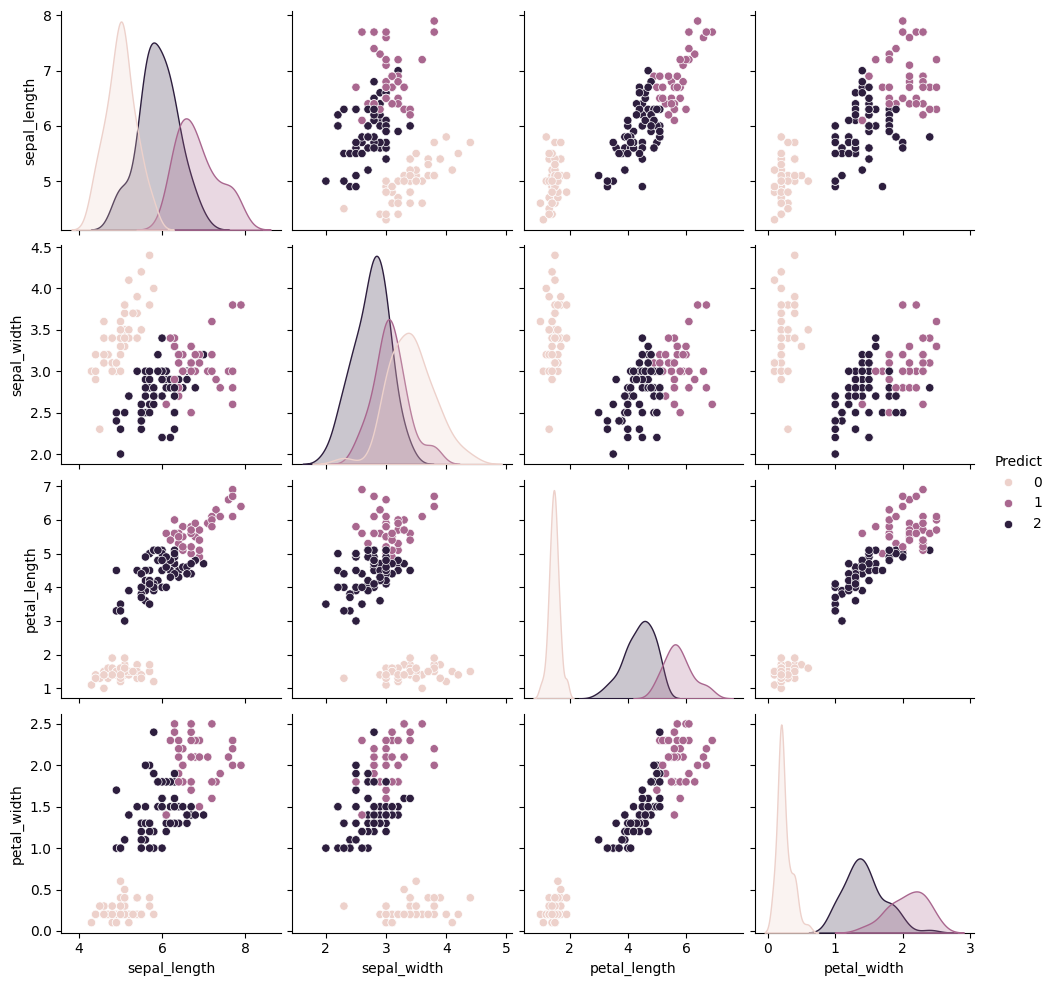

In [26]:
sns.pairplot(data=new_df , hue="Predict")
plt.savefig("prediction.jpg")
plt.show()


In [27]:
org_data = pd.read_csv("IRIS.csv")

<Figure size 500x600 with 0 Axes>

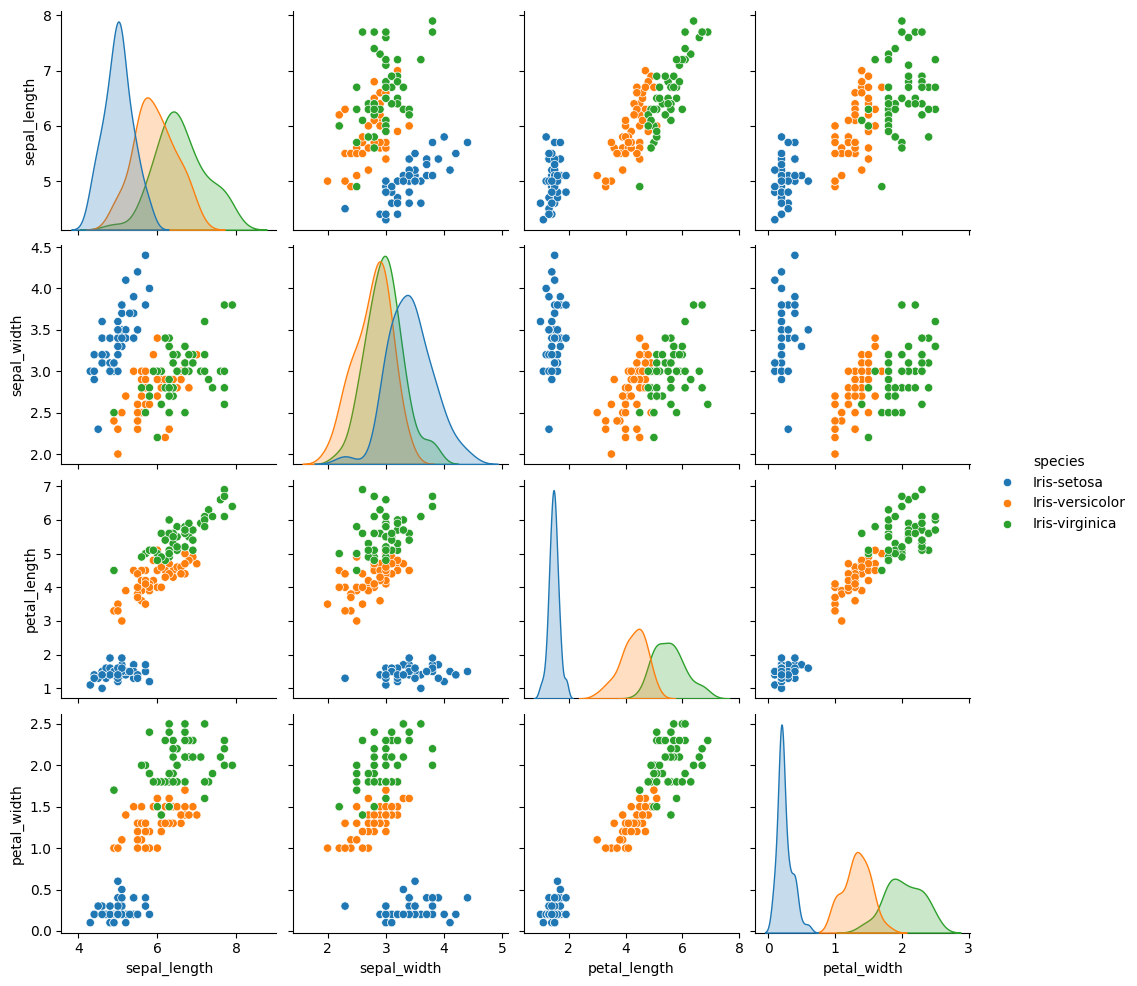

In [28]:
plt.figure(figsize=(5,6))
sns.pairplot(data=org_data , hue="species")
plt.savefig("original.jpg")
plt.show()

In [29]:
# New Clustering

In [69]:
kmn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [70]:
from sklearn.metrics import silhouette_score

In [71]:
silhouette_score(new_df , labels=kmn.labels_)*100

62.294900141314216

In [72]:
ss = []
no_c = [j for j in range(2,21)]
for i in range(2,21):
    km1 = KMeans(n_clusters=i)
    km1.fit(new_df)
    ss.append(silhouette_score(new_df , km1.labels_))
    

c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HP\healthcare\noman\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. 

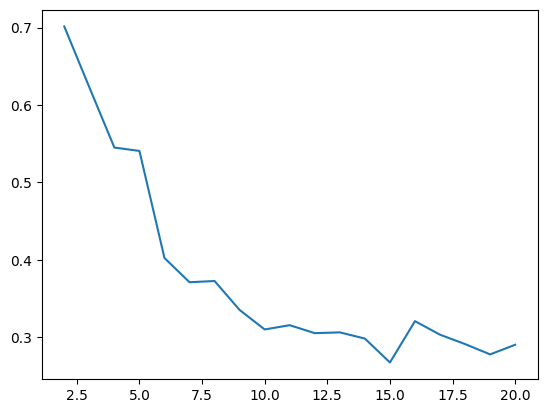

In [73]:
plt.plot(no_c , ss)
plt.show()

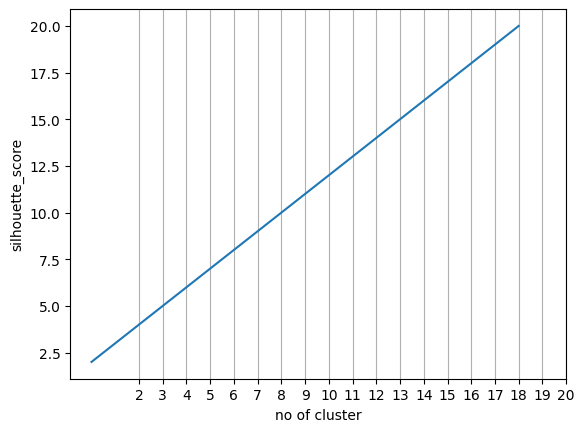

In [74]:
plt.plot(no_c)
plt.xlabel("no of cluster")
plt.ylabel("silhouette_score")
plt.xticks(no_c)
plt.grid(axis="x")
plt.show()